In [2]:
import torch, pickle, argparse, os
import importlib
from fig_settings import *

In [39]:
run_id = 'material_model_run_3'
params = torch.load(run_id+'/args.pkl', weights_only=True)
args = argparse.Namespace(**params)  
folder = f'overleaf/figs/{run_id}' 

if not os.path.exists(folder):
    os.makedirs(folder)

In [66]:
mm = importlib.import_module(args.material_model)
from util import LossFunction
from m_encoder import *

device = torch.device(args.device if torch.cuda.is_available() else "cpu")

with open(args.data_path, "rb") as f:
    data = pickle.load(f)


N = args.n_samples
step = args.step

loss_function = LossFunction()

ae_E = AutoEncoder(501, args.encoder_hidden_dim, args.encoder_latent_dim).to(
    device
)
ae_nu = AutoEncoder(501, args.encoder_hidden_dim, args.encoder_latent_dim).to(
    device
)

ae_E.load_state_dict(torch.load(f"{args.encoder_path}/ae_E.pth", weights_only=True, map_location=torch.device('cpu')))
ae_nu.load_state_dict(torch.load(f"{args.encoder_path}/ae_nu.pth", weights_only=True, map_location=torch.device('cpu')))

<All keys matched successfully>

In [67]:
energy_input_dim = (1, 1, args.encoder_latent_dim * 2)
energy_hidden_dim = args.hidden_dim
dissipation_input_dim = (1, 1, args.encoder_latent_dim * 2)
dissipation_hidden_dim = args.hidden_dim

vmm = mm.ViscoelasticMaterialModelM(
    energy_input_dim,
    energy_hidden_dim,
    dissipation_input_dim,
    dissipation_hidden_dim,
    ae_E.encoder,
    ae_nu.encoder,
    dt = step/5000,
).to(device)

vmm.load_state_dict(torch.load(f"material_model_run_{args.run_id}/vmm.pth", weights_only=True, map_location=torch.device('cpu')))


<All keys matched successfully>

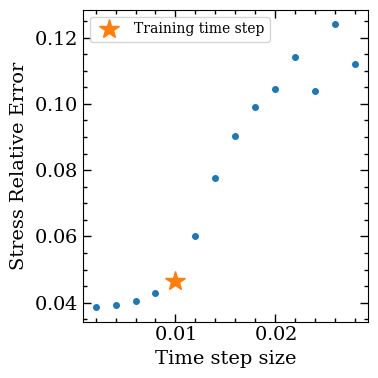